 Best Parameters: {'estimator__max_depth': 1, 'learning_rate': 0.5, 'n_estimators': 150}

 Classification Report (Tuned AdaBoost):

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       135
           1       0.62      0.29      0.40        17

    accuracy                           0.90       152
   macro avg       0.77      0.64      0.67       152
weighted avg       0.88      0.90      0.89       152

 Accuracy: 0.9013


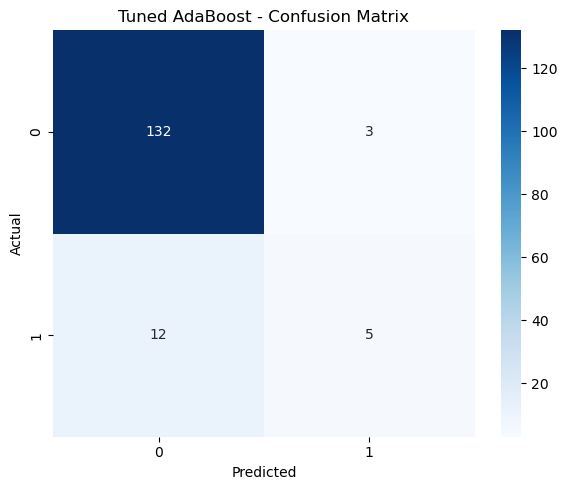

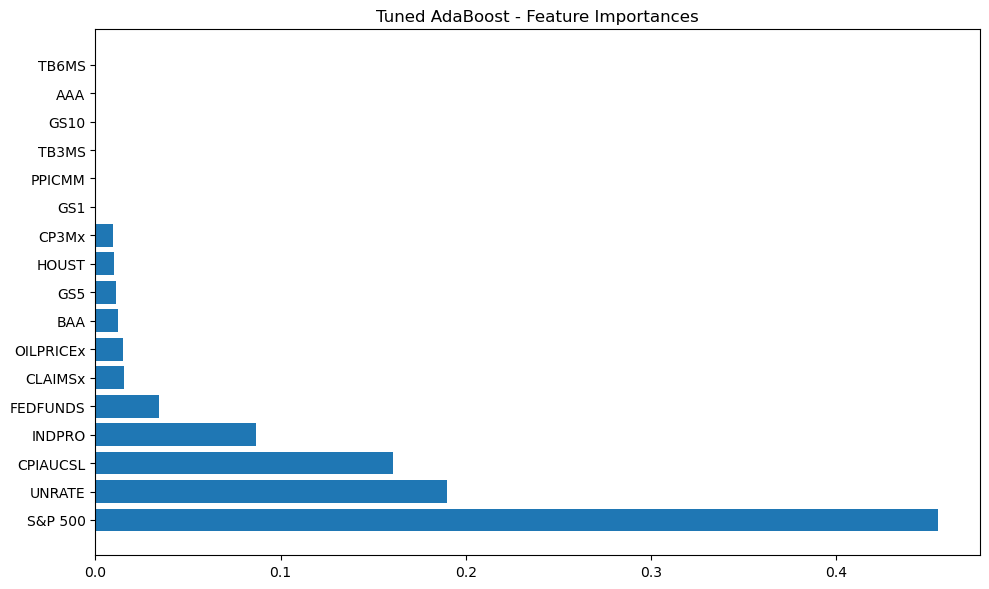

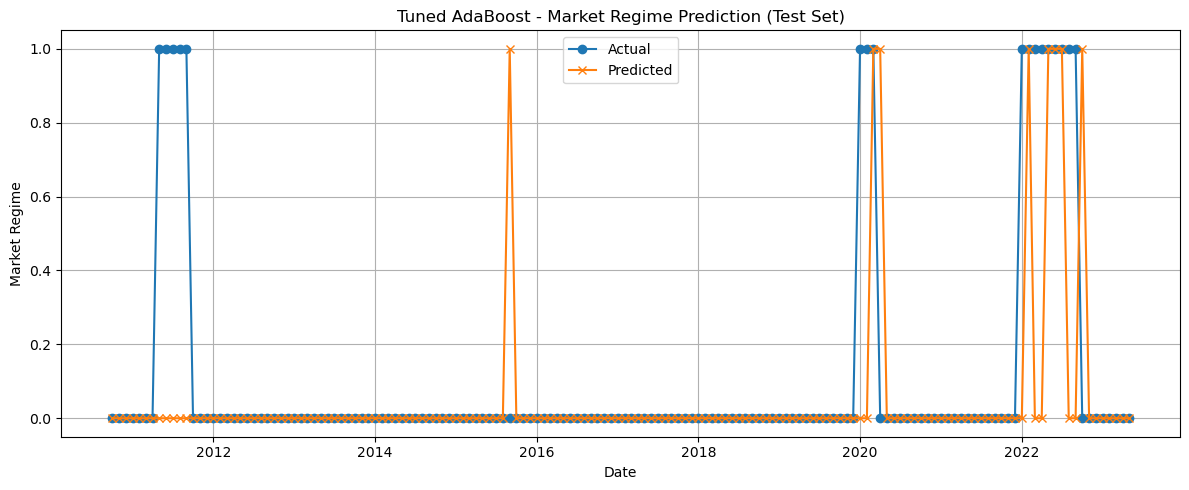

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


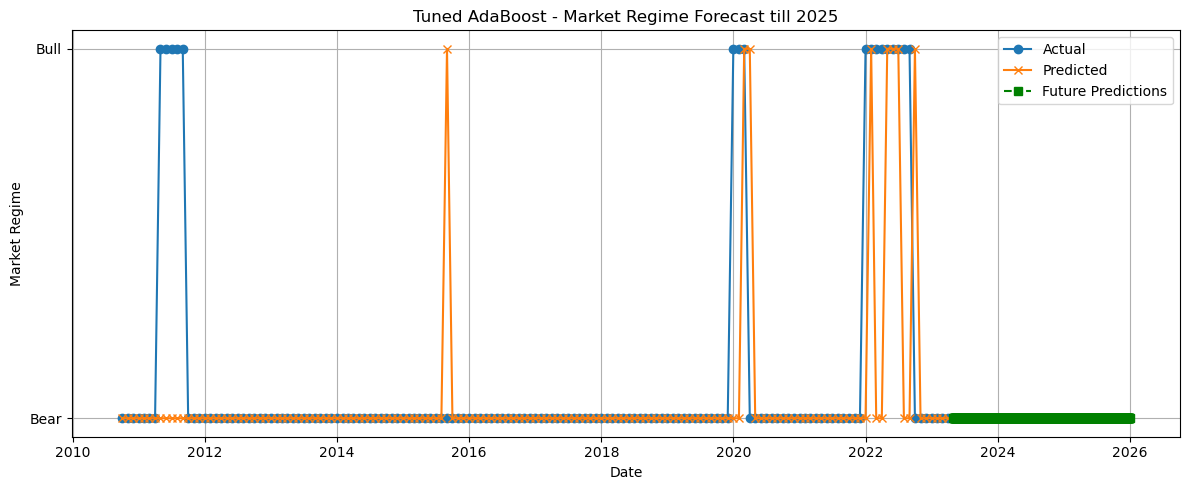

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Load data
df = pd.read_excel('MARKET REGIME DATASET.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Step 2: Drop rows with missing values
df = df.dropna()

# Step 3: Split features and target
features = df.drop(columns=['Date', 'MktRegime'])
target = df['MktRegime']

# Step 4: Feature Scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 5: Chronological Train-Test Split (80% train, 20% test)
split_idx = int(len(df) * 0.8)
X_train = features_scaled[:split_idx]
y_train = target[:split_idx]
X_test = features_scaled[split_idx:]
y_test = target[split_idx:]
dates_test = df['Date'].iloc[split_idx:]

# Step 6: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.5, 1.0, 1.5],
    'estimator__max_depth': [1, 2, 3]
}

base_estimator = DecisionTreeClassifier()
ada = AdaBoostClassifier(estimator=base_estimator, random_state=42)

grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_ada = grid_search.best_estimator_

# Step 7: Make Predictions
y_pred = best_ada.predict(X_test)

# Step 8: Evaluation
print(" Best Parameters:", grid_search.best_params_)
print("\n Classification Report (Tuned AdaBoost):\n")
print(classification_report(y_test, y_pred))
print(f" Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Tuned AdaBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 10: Feature Importance
plt.figure(figsize=(10, 6))
feature_importances = best_ada.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
plt.barh(range(len(features.columns)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(features.columns)), features.columns[sorted_idx])
plt.title("Tuned AdaBoost - Feature Importances")
plt.tight_layout()
plt.show()

# Step 11: Actual vs Predicted over Time
plt.figure(figsize=(12, 5))
plt.plot(dates_test.values, y_test.values, label='Actual', marker='o')
plt.plot(dates_test.values, y_pred, label='Predicted', marker='x')
plt.title('Tuned AdaBoost - Market Regime Prediction (Test Set)')
plt.xlabel('Date')
plt.ylabel('Market Regime')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 12: Forecasting till 2025
future_dates = pd.date_range(start=dates_test.values[-1] + pd.Timedelta(days=1), end='2025-12-31')

# Simulate future features using last known row
future_features = np.tile(features.iloc[-1].values, (len(future_dates), 1))

# Scale future features
future_features_scaled = scaler.transform(future_features)

# Predict future regimes
future_predictions = best_ada.predict(future_features_scaled)

# Plot actual, predicted, and future predictions
plt.figure(figsize=(12, 5))
plt.plot(dates_test.values, y_test.values, label='Actual', marker='o')
plt.plot(dates_test.values, y_pred, label='Predicted', marker='x')
plt.plot(future_dates, future_predictions, label='Future Predictions', marker='s', linestyle='--', color='green')
plt.title('Tuned AdaBoost - Market Regime Forecast till 2025')
plt.xlabel('Date')
plt.ylabel('Market Regime')
plt.yticks([0, 1], ['Bear', 'Bull'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📊 Classification Report (Gradient Boosting):

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       135
           1       0.31      0.24      0.27        17

    accuracy                           0.86       152
   macro avg       0.61      0.58      0.59       152
weighted avg       0.84      0.86      0.85       152



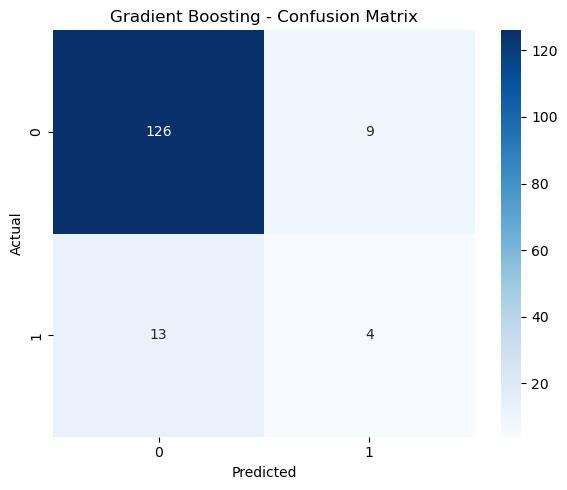

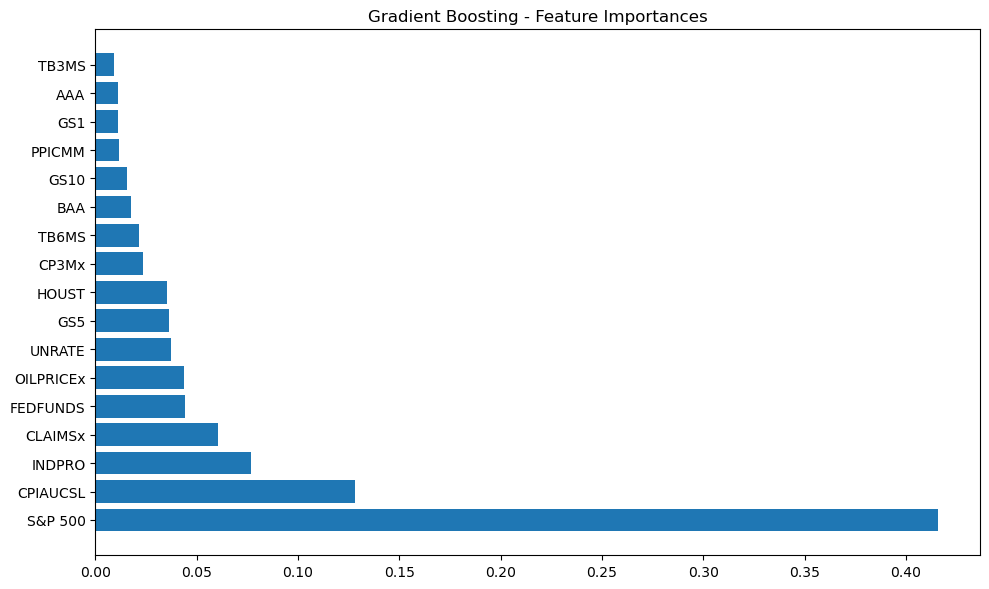

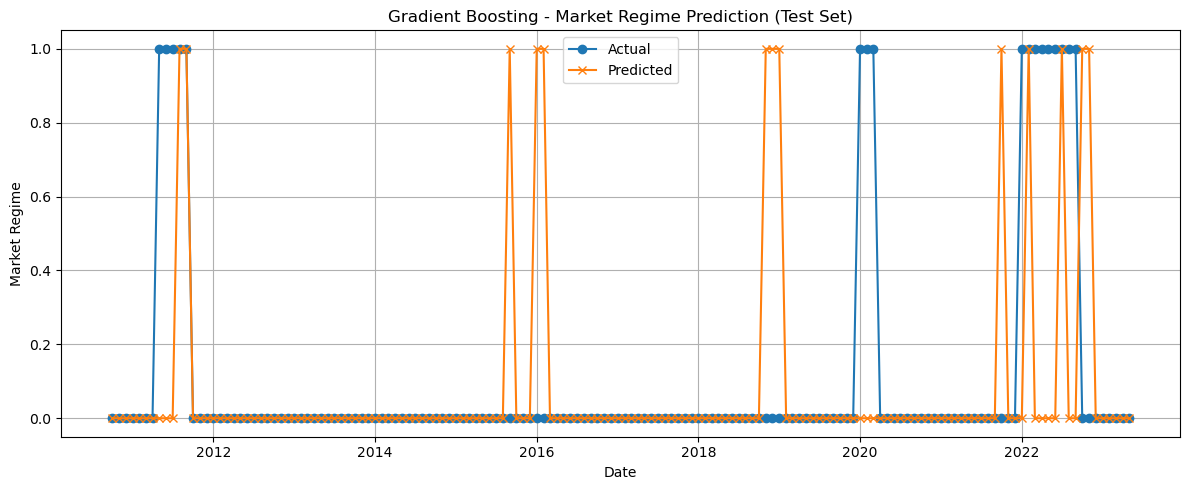

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


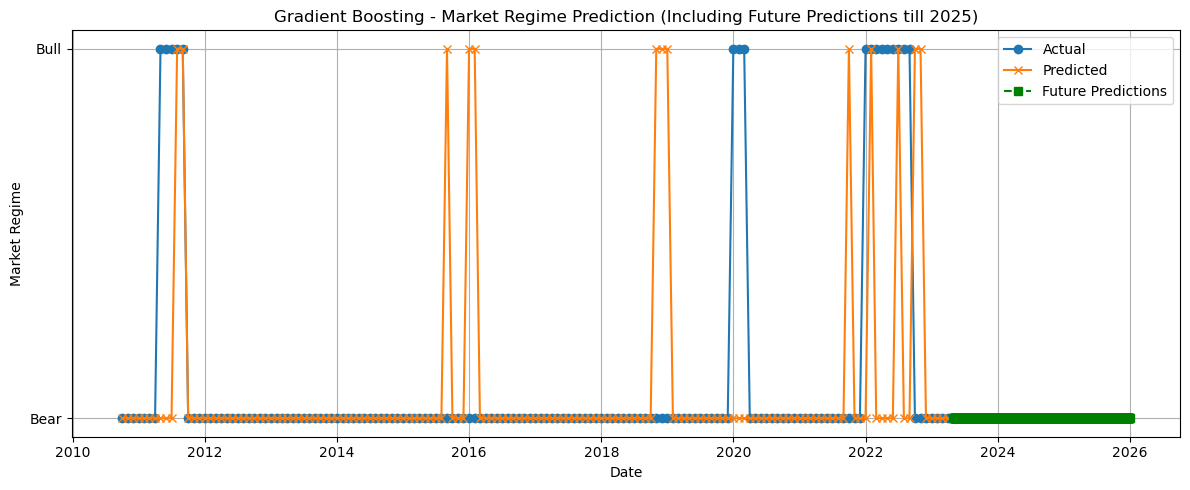

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Step 1: Load data
df = pd.read_excel('MARKET REGIME DATASET.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Step 2: Drop rows with missing values
df = df.dropna()

# Step 3: Split features and target
features = df.drop(columns=['Date', 'MktRegime'])
target = df['MktRegime']

# Step 4: Feature Scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 5: Chronological Train-Test Split (80% train, 20% test)
split_idx = int(len(df) * 0.8)
X_train = features_scaled[:split_idx]
y_train = target[:split_idx]
X_test = features_scaled[split_idx:]
y_test = target[split_idx:]
dates_test = df['Date'].iloc[split_idx:]

# Step 6: Train Gradient Boosting Model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluation
print("📊 Classification Report (Gradient Boosting):\n")
print(classification_report(y_test, y_pred))

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 10: Feature Importance
plt.figure(figsize=(10, 6))
feature_importance = model.feature_importances_
indices = np.argsort(feature_importance)[::-1]  # Sort by importance
plt.barh(range(len(indices)), feature_importance[indices])
plt.yticks(range(len(indices)), np.array(features.columns)[indices])
plt.title("Gradient Boosting - Feature Importances")
plt.tight_layout()
plt.show()

# Step 11: Actual vs Predicted over Time
plt.figure(figsize=(12, 5))
plt.plot(dates_test.values, y_test.values, label='Actual', marker='o')
plt.plot(dates_test.values, y_pred, label='Predicted', marker='x')
plt.title('Gradient Boosting - Market Regime Prediction (Test Set)')
plt.xlabel('Date')
plt.ylabel('Market Regime')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 12: Predicting till 2025
future_dates = pd.date_range(start=dates_test.values[-1] + pd.Timedelta(days=1), end='2025-12-31')

# Reuse last known feature row to simulate future data
future_features = np.tile(features.iloc[-1].values, (len(future_dates), 1))

# Scale future features
future_features_scaled = scaler.transform(future_features)

# Make predictions for future dates
future_predictions = model.predict(future_features_scaled)

plt.figure(figsize=(12, 5))
plt.plot(dates_test.values, y_test.values, label='Actual', marker='o')
plt.plot(dates_test.values, y_pred, label='Predicted', marker='x')
plt.plot(future_dates, future_predictions, label='Future Predictions', marker='s', linestyle='--', color='green')
plt.title('Gradient Boosting - Market Regime Prediction (Including Future Predictions till 2025)')
plt.xlabel('Date')
plt.ylabel('Market Regime')

# Change y-axis to "Bear" and "Bull"
plt.yticks([0, 1], ['Bear', 'Bull'])

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📊 Classification Report (XGBoost):

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       135
           1       0.31      0.24      0.27        17

    accuracy                           0.86       152
   macro avg       0.61      0.58      0.59       152
weighted avg       0.84      0.86      0.85       152



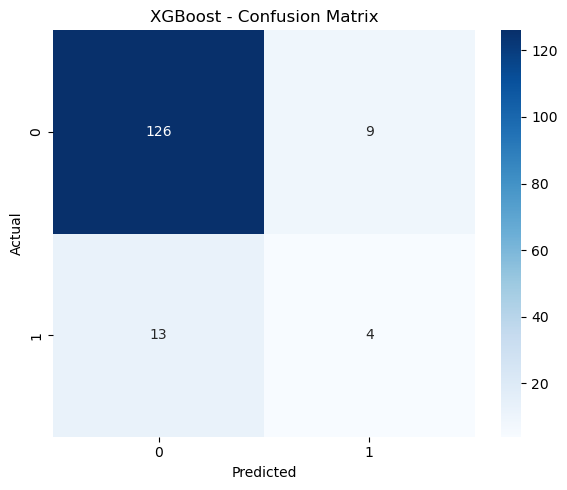

<Figure size 1000x600 with 0 Axes>

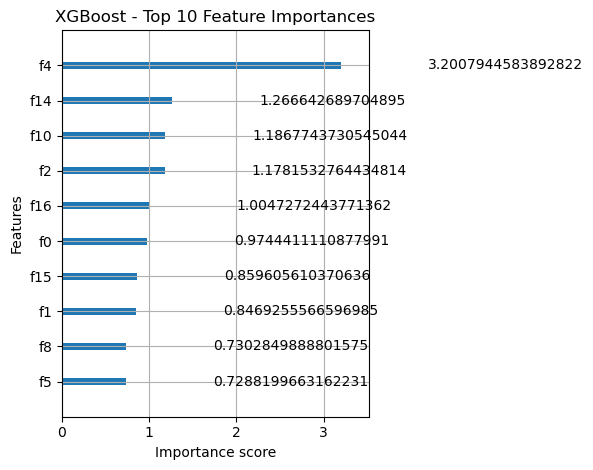

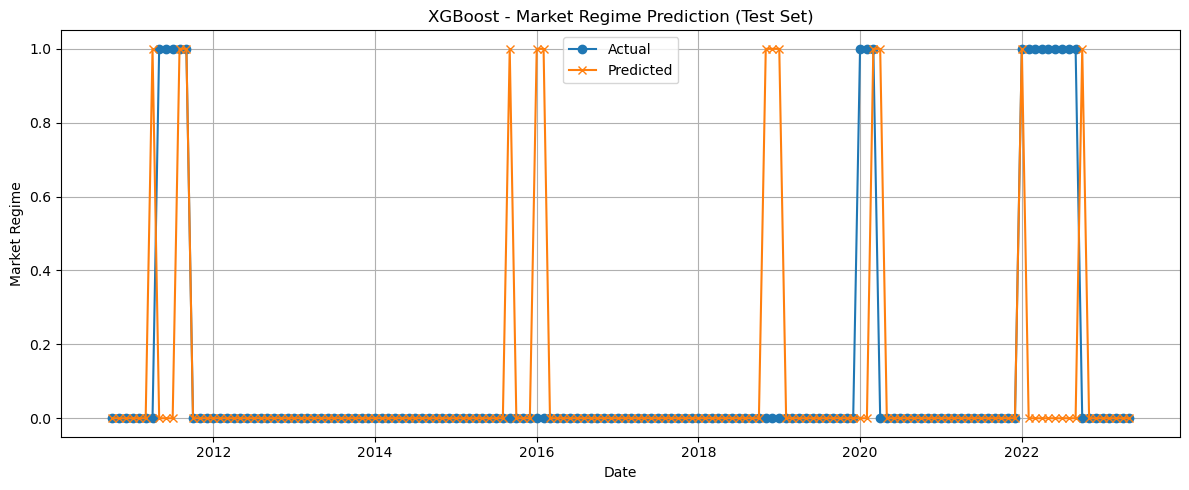

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


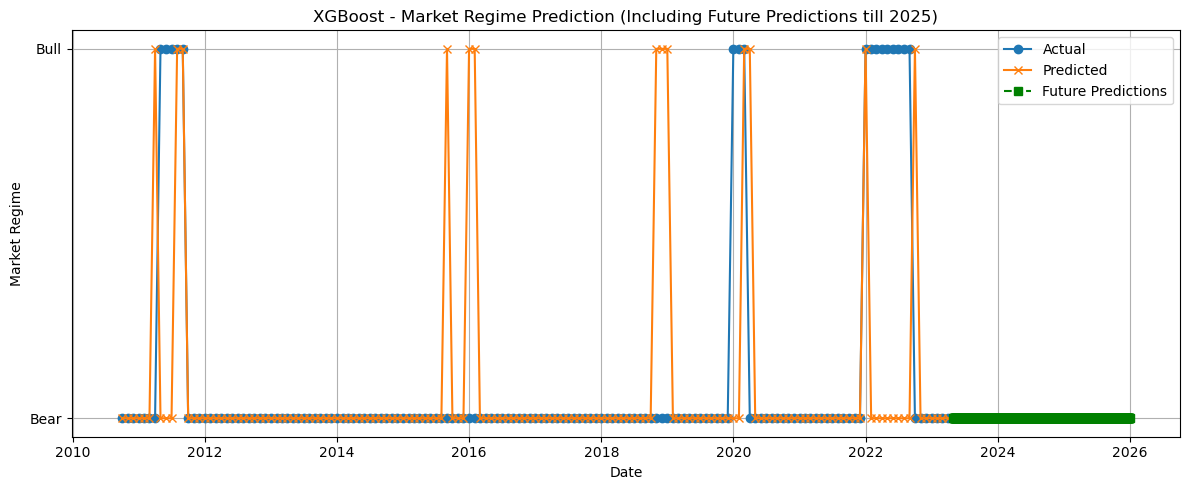

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier, plot_importance

# Step 1: Load data
df = pd.read_excel('MARKET REGIME DATASET.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Step 2: Drop rows with missing values
df = df.dropna()

# Step 3: Split features and target
features = df.drop(columns=['Date', 'MktRegime'])
target = df['MktRegime']

# Step 4: Feature Scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 5: Chronological Train-Test Split (80% train, 20% test)
split_idx = int(len(df) * 0.8)
X_train = features_scaled[:split_idx]
y_train = target[:split_idx]
X_test = features_scaled[split_idx:]
y_test = target[split_idx:]
dates_test = df['Date'].iloc[split_idx:]

# Step 6: Train XGBoost Model
model = XGBClassifier()
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluation
print("📊 Classification Report (XGBoost):\n")
print(classification_report(y_test, y_pred))

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 10: Feature Importance
plt.figure(figsize=(10, 6))
plot_importance(model, max_num_features=10, importance_type='gain')
plt.title("XGBoost - Top 10 Feature Importances")
plt.tight_layout()
plt.show()

# Step 11: Actual vs Predicted over Time
plt.figure(figsize=(12, 5))
plt.plot(dates_test.values, y_test.values, label='Actual', marker='o')
plt.plot(dates_test.values, y_pred, label='Predicted', marker='x')
plt.title('XGBoost - Market Regime Prediction (Test Set)')
plt.xlabel('Date')
plt.ylabel('Market Regime')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 12: Predicting till 2025
future_dates = pd.date_range(start=dates_test.values[-1] + pd.Timedelta(days=1), end='2025-12-31')

# Reuse last known feature row to simulate future data
future_features = np.tile(features.iloc[-1].values, (len(future_dates), 1))

# Scale future features
future_features_scaled = scaler.transform(future_features)

# Make predictions for future dates
future_predictions = model.predict(future_features_scaled)

plt.figure(figsize=(12, 5))
plt.plot(dates_test.values, y_test.values, label='Actual', marker='o')
plt.plot(dates_test.values, y_pred, label='Predicted', marker='x')
plt.plot(future_dates, future_predictions, label='Future Predictions', marker='s', linestyle='--', color='green')
plt.title('XGBoost - Market Regime Prediction (Including Future Predictions till 2025)')
plt.xlabel('Date')
plt.ylabel('Market Regime')

# Change y-axis to "Bear" and "Bull"
plt.yticks([0, 1], ['Bear', 'Bull'])

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📊 Classification Report (Logistic Regression):

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       135
           1       0.50      0.29      0.37        17

    accuracy                           0.89       152
   macro avg       0.71      0.63      0.65       152
weighted avg       0.87      0.89      0.88       152



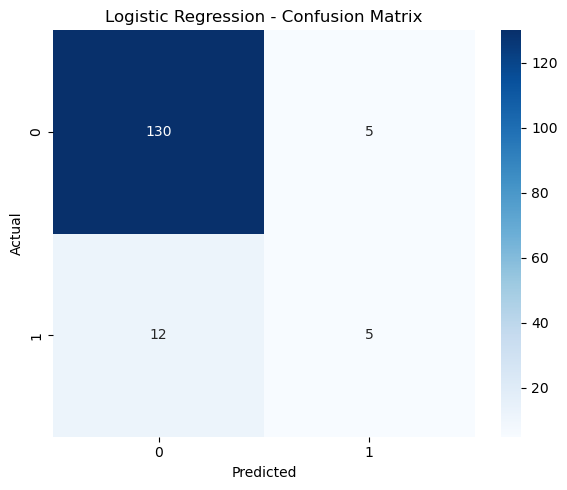

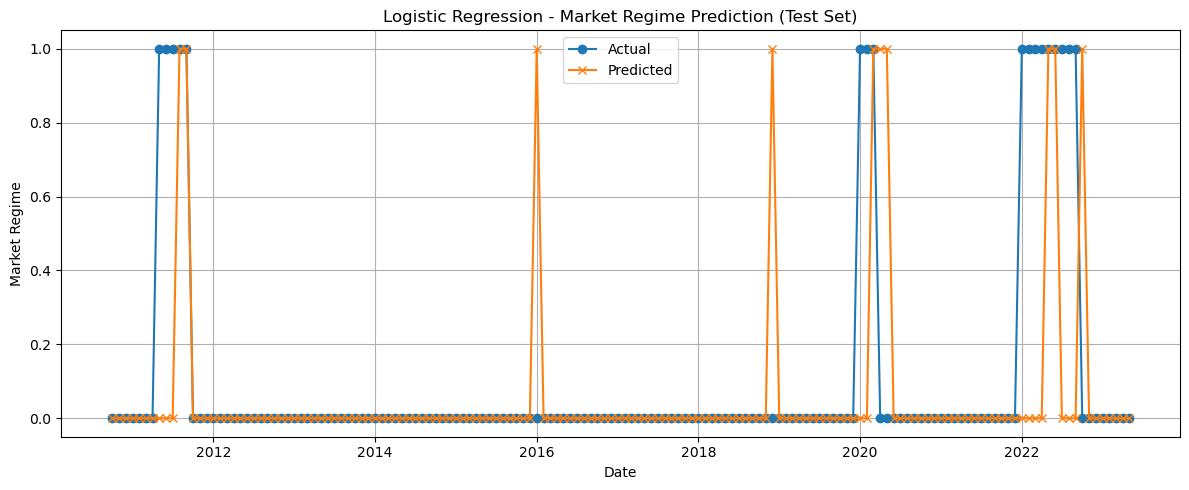

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


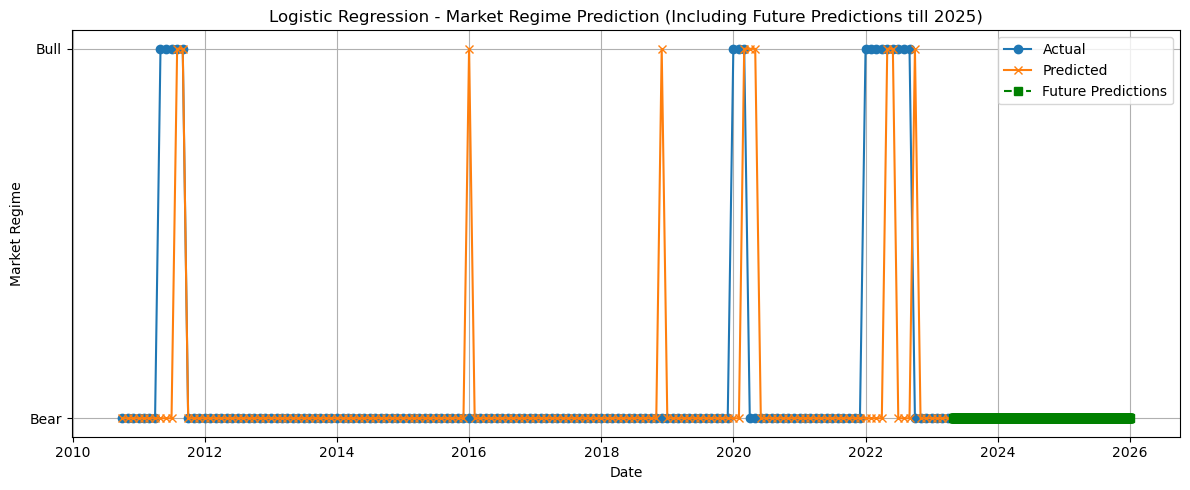

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Step 1: Load data
df = pd.read_excel('MARKET REGIME DATASET.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Step 2: Drop rows with missing values
df = df.dropna()

# Step 3: Split features and target
features = df.drop(columns=['Date', 'MktRegime'])
target = df['MktRegime']

# Step 4: Feature Scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 5: Chronological Train-Test Split (80% train, 20% test)
split_idx = int(len(df) * 0.8)
X_train = features_scaled[:split_idx]
y_train = target[:split_idx]
X_test = features_scaled[split_idx:]
y_test = target[split_idx:]
dates_test = df['Date'].iloc[split_idx:]

# Step 6: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluation
print("📊 Classification Report (Logistic Regression):\n")
print(classification_report(y_test, y_pred))

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 10: Actual vs Predicted over Time
plt.figure(figsize=(12, 5))
plt.plot(dates_test.values, y_test.values, label='Actual', marker='o')
plt.plot(dates_test.values, y_pred, label='Predicted', marker='x')
plt.title('Logistic Regression - Market Regime Prediction (Test Set)')
plt.xlabel('Date')
plt.ylabel('Market Regime')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 11: Predicting till 2025
future_dates = pd.date_range(start=dates_test.values[-1] + pd.Timedelta(days=1), end='2025-12-31')

# Reuse last known feature row to simulate future data
future_features = np.tile(features.iloc[-1].values, (len(future_dates), 1))

# Scale future features
future_features_scaled = scaler.transform(future_features)

# Make predictions for future dates
future_predictions = model.predict(future_features_scaled)

plt.figure(figsize=(12, 5))
plt.plot(dates_test.values, y_test.values, label='Actual', marker='o')
plt.plot(dates_test.values, y_pred, label='Predicted', marker='x')
plt.plot(future_dates, future_predictions, label='Future Predictions', marker='s', linestyle='--', color='green')
plt.title('Logistic Regression - Market Regime Prediction (Including Future Predictions till 2025)')
plt.xlabel('Date')
plt.ylabel('Market Regime')

# Change y-axis to "Bear" and "Bull"
plt.yticks([0, 1], ['Bear', 'Bull'])

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📊 Classification Report (Gradient Boosting):

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       135
           1       0.25      0.18      0.21        17

    accuracy                           0.85       152
   macro avg       0.57      0.55      0.56       152
weighted avg       0.83      0.85      0.84       152



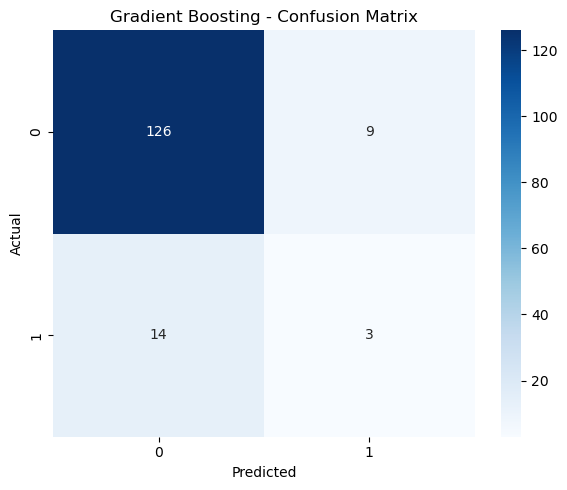

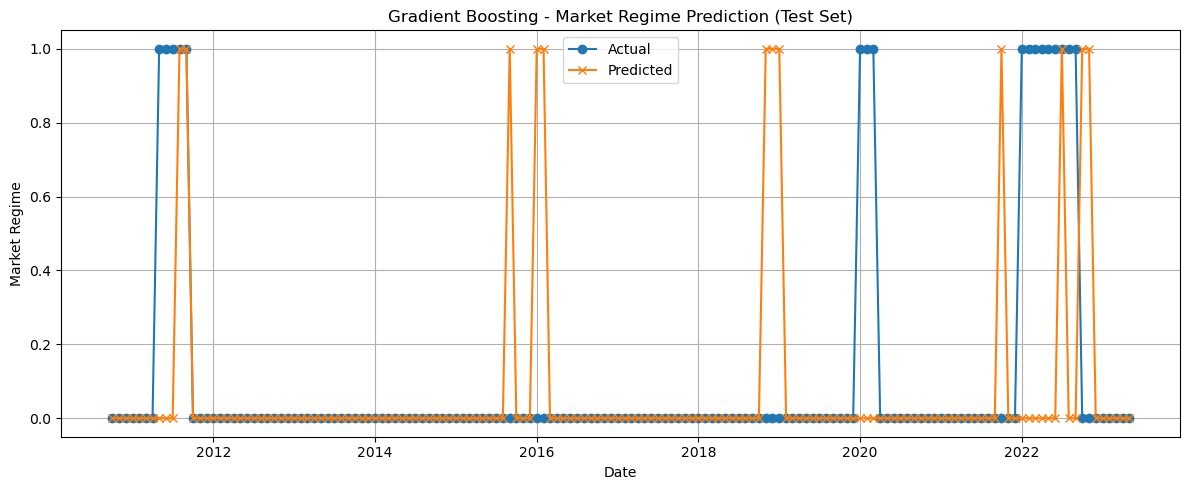

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


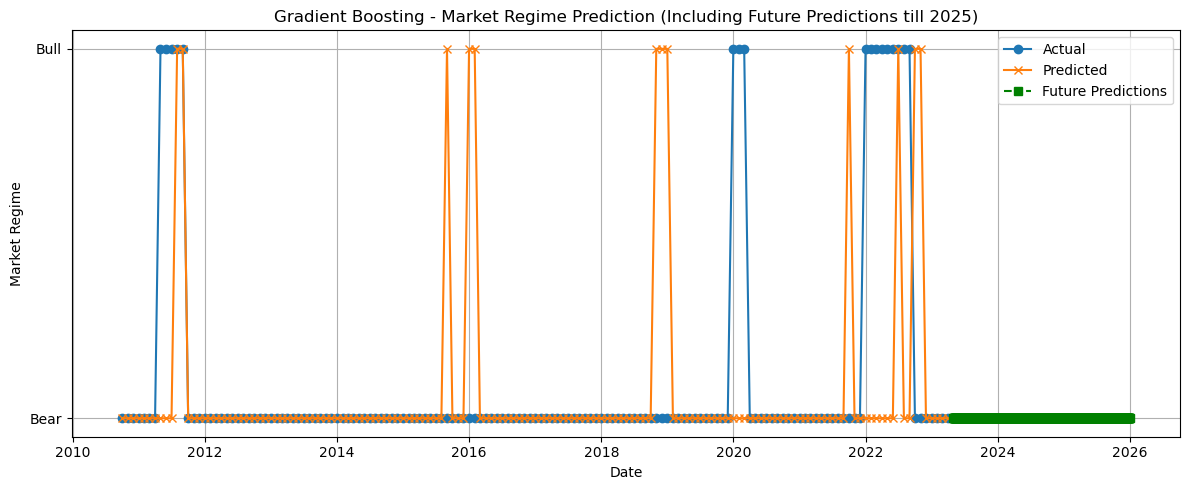

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

# Step 1: Load data
df = pd.read_excel('MARKET REGIME DATASET.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Step 2: Drop rows with missing values
df = df.dropna()

# Step 3: Split features and target
features = df.drop(columns=['Date', 'MktRegime'])
target = df['MktRegime']

# Step 4: Feature Scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 5: Chronological Train-Test Split (80% train, 20% test)
split_idx = int(len(df) * 0.8)
X_train = features_scaled[:split_idx]
y_train = target[:split_idx]
X_test = features_scaled[split_idx:]
y_test = target[split_idx:]
dates_test = df['Date'].iloc[split_idx:]

# Step 6: Train Gradient Boosting Model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluation
print("📊 Classification Report (Gradient Boosting):\n")
print(classification_report(y_test, y_pred))

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 10: Actual vs Predicted over Time
plt.figure(figsize=(12, 5))
plt.plot(dates_test.values, y_test.values, label='Actual', marker='o')
plt.plot(dates_test.values, y_pred, label='Predicted', marker='x')
plt.title('Gradient Boosting - Market Regime Prediction (Test Set)')
plt.xlabel('Date')
plt.ylabel('Market Regime')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 11: Predicting till 2025
future_dates = pd.date_range(start=dates_test.values[-1] + pd.Timedelta(days=1), end='2025-12-31')

# Reuse last known feature row to simulate future data
future_features = np.tile(features.iloc[-1].values, (len(future_dates), 1))

# Scale future features
future_features_scaled = scaler.transform(future_features)

# Make predictions for future dates
future_predictions = model.predict(future_features_scaled)

plt.figure(figsize=(12, 5))
plt.plot(dates_test.values, y_test.values, label='Actual', marker='o')
plt.plot(dates_test.values, y_pred, label='Predicted', marker='x')
plt.plot(future_dates, future_predictions, label='Future Predictions', marker='s', linestyle='--', color='green')
plt.title('Gradient Boosting - Market Regime Prediction (Including Future Predictions till 2025)')
plt.xlabel('Date')
plt.ylabel('Market Regime')

# Change y-axis to "Bear" and "Bull"
plt.yticks([0, 1], ['Bear', 'Bull'])

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE

# Step 1: Load data
df = pd.read_excel('MARKET REGIME DATASET.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Step 2: Drop rows with missing values
df = df.dropna()

# Step 3: Feature Engineering (Lagged Features, Rolling Averages & Polynomial Features)
for col in df.columns:
    if col not in ['Date', 'MktRegime']:
        df[f'{col}_lag1'] = df[col].shift(1)  # 1-day lag
        df[f'{col}_rolling3'] = df[col].rolling(window=3).mean()  # 3-day rolling average
df = df.dropna()  # Drop NaN rows after feature creation

# Step 4: Split features and target
features = df.drop(columns=['Date', 'MktRegime'])
target = df['MktRegime']

# Step 5: Feature Scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 6: Chronological Train-Test Split (80% train, 20% test)
split_idx = int(len(df) * 0.8)
X_train, y_train = features_scaled[:split_idx], target[:split_idx]
X_test, y_test = features_scaled[split_idx:], target[split_idx:]
dates_test = df['Date'].iloc[split_idx:]

# Step 7: Handle Class Imbalance Using SMOTE
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 8: Polynomial Feature Expansion (Adds interaction terms)
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_balanced)
X_test_poly = poly.transform(X_test)

# Step 9: Hyperparameter Tuning Using RandomizedSearchCV
param_grid = {
    'n_estimators': [200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

gb_model = GradientBoostingClassifier()
grid_search = RandomizedSearchCV(gb_model, param_grid, cv=5, scoring='accuracy', n_iter=10, n_jobs=-1)
grid_search.fit(X_train_poly, y_train_balanced)

best_gb_model = grid_search.best_estimator_

# Step 10: Stacking Ensemble Learning (Combines GB, RF, and Logistic Regression)
estimators = [
    ('gb', best_gb_model),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=7)),
    ('lr', LogisticRegression())
]

stacked_model = StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier())
stacked_model.fit(X_train_poly, y_train_balanced)

# Step 11: Make Predictions
y_pred = stacked_model.predict(X_test_poly)

# Step 12: Evaluation
print("📊 Classification Report (Optimized Stacking Model):\n")
print(classification_report(y_test, y_pred))

# Step 13: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Optimized Stacking Model - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 14: Predicting till 2025
future_dates = pd.date_range(start=dates_test.values[-1] + pd.Timedelta(days=1), end='2025-12-31')

# Reuse last known feature row to simulate future data
future_features = np.tile(features.iloc[-1].values, (len(future_dates), 1))

# Scale future features
future_features_scaled = scaler.transform(future_features)

# Transform using polynomial feature expansion
future_features_poly = poly.transform(future_features_scaled)

# Make predictions for future dates
future_predictions = stacked_model.predict(future_features_poly)

plt.figure(figsize=(12, 5))
plt.plot(dates_test.values, y_test.values, label='Actual', marker='o')
plt.plot(dates_test.values, y_pred, label='Predicted', marker='x')
plt.plot(future_dates, future_predictions, label='Future Predictions', marker='s', linestyle='--', color='green')
plt.title('Optimized Stacking Model - Market Regime Prediction (Including Future Predictions till 2025)')
plt.xlabel('Date')
plt.ylabel('Market Regime')

# Change y-axis to "Bear" and "Bull"
plt.yticks([0, 1], ['Bear', 'Bull'])

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
